In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from matplotlib.ticker import PercentFormatter


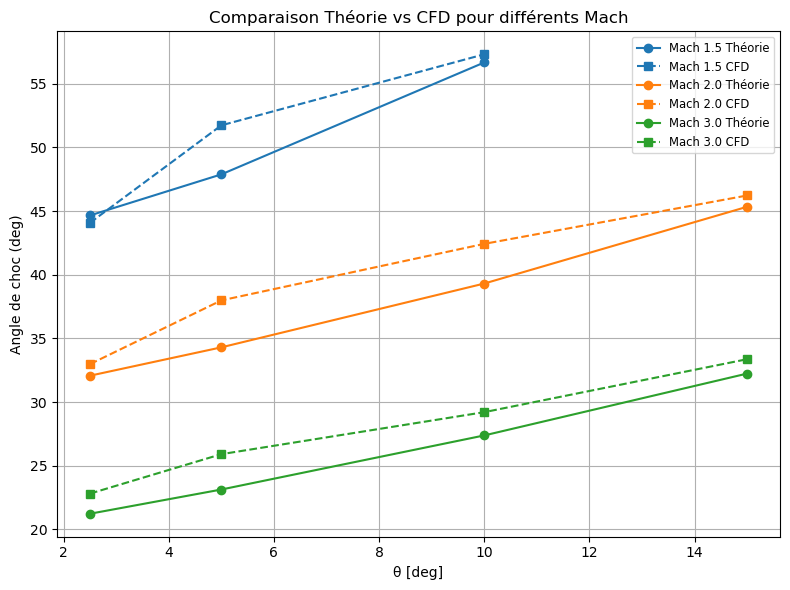

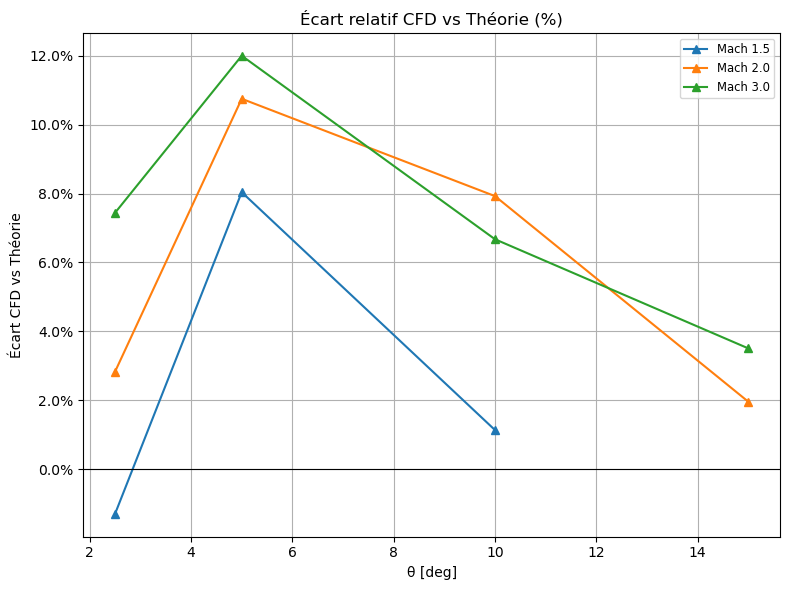

In [5]:
# 1) Chargement des données depuis une chaîne CSV
csv_data = """Mach,theta,Theory,CFD
1.5,2.5,44.660755,44.08
1.5,5.0,47.889264,51.74
1.5,10.0,56.678677,57.32
2.0,2.5,32.072802,32.98
2.0,5.0,34.301575,37.99
2.0,10.0,39.313932,42.43
2.0,15.0,45.343617,46.23
3.0,2.5,21.229960,22.81
3.0,5.0,23.133257,25.91
3.0,10.0,27.382691,29.21
3.0,15.0,32.240400,33.37
"""
data = pd.read_csv(StringIO(csv_data))

# 2) Préparation de la figure
fig, ax = plt.subplots(figsize=(8, 6))

# Palette de couleurs automatique
colors = plt.get_cmap('tab10')

# 3) Boucle sur chaque Mach
for idx, mach in enumerate(sorted(data['Mach'].unique())):
    sub = data[data['Mach'] == mach]
    # Théorie
    ax.plot(sub['theta'], sub['Theory'],
            marker='o', linestyle='-',
            color=colors(idx),
            label=f'Mach {mach} Théorie')
    # CFD
    ax.plot(sub['theta'], sub['CFD'],
            marker='s', linestyle='--',
            color=colors(idx),
            label=f'Mach {mach} CFD')

# 4) Mise en forme
ax.set_xlabel('θ [deg]')
ax.set_ylabel('Angle de choc (deg)')
ax.set_title('Comparaison Théorie vs CFD pour différents Mach')
ax.grid(True)
ax.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()

# 5) Optionnel : tracer l’écart CFD – Theory
fig, ax = plt.subplots(figsize=(8, 6))
colors = plt.get_cmap('tab10')

for idx, mach in enumerate(sorted(data['Mach'].unique())):
    sub = data[data['Mach'] == mach]
    # calcul de l'écart relatif en %
    diff_pct = 100 * (sub['CFD'] - sub['Theory']) / sub['Theory']
    ax.plot(sub['theta'], diff_pct,
            marker='^', linestyle='-',
            color=colors(idx),
            label=f'Mach {mach}')

# formatage de l'axe y en pourcentage
ax.yaxis.set_major_formatter(PercentFormatter())

ax.axhline(0, color='k', linewidth=0.8)
ax.set_xlabel('θ [deg]')
ax.set_ylabel('Écart CFD vs Théorie')
ax.set_title("Écart relatif CFD vs Théorie (%)")
ax.grid(True)
ax.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()
